In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.layers import Embedding, Dense, LSTM 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import rhinoMorph

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
rn = rhinoMorph.startRhino()

filepath:  /Users/Moon/opt/anaconda3/lib/python3.7/site-packages
classpath:  /Users/Moon/opt/anaconda3/lib/python3.7/site-packages/rhinoMorph/lib/rhino.jar
RHINO started!


### 빈도분석

In [4]:
df = pd.read_csv('./크롤링 20000개.csv', encoding = 'utf-8')

In [5]:
df1 = df.drop(['번호'], axis = 1)
df1

,내용,Label
0,"본론으로 바로 들어갈게요 전 고3여학생인데요,가족이 죽으면 울지안울지 모르겠어요. ...",0
1,"저아시죠?ㅎㅎ..질문1. 3번문제질문2.두아이는 쌍둥이에요 , 피아노가 잘 안쳐져요...",0
2,제나이는 20대후반이고 여친은 저보다 3살 어립니다. 사귄지는 5개월정도 됐는데제가...,0
3,이게 학교 숙제라서 ㅠㅜ 영어 말하기대회를 하는데 전교생이 다한다는거예요 -┏그래서...,0
4,"새벽에 나가시는 아빠한테 ""조심하시고 잘 다녀오세요""한마디 못하고 밤 늦게 오시는 ...",0
...,...,...
19995,\n\t\t\t\t\t\t저희 엄마가 술을 너무 많이 마셔서 가족들이 5년간 걱정하...,1
19996,\n\t\t\t\t\t\t저희 엄마가 술을 너무 많이 마셔서 가족들이 5년간 걱정하...,1
19997,\n\t\t\t\t\t\t76세 아빠가 술을 이기지도 못하시면서 하루도 안거르고 술...,1
19998,\n 엄마는 약 10여년전부터 꾸준히 술을 드셨고 알콜중독이 확실합니다. 거의 매일...,1


In [6]:
list1 = df1.values.tolist()
list1

[['본론으로 바로 들어갈게요 전 고3여학생인데요,가족이 죽으면 울지안울지 모르겠어요. 그리고 인터넷보면 가족들한테 엄마아빠가 문자로 사랑한다 뭐 사준다 뭐 먹자 뭐하냐 이런다는데 우리 부모님은 한번도 그런적이없어요 저가 친오빠가 있는데요 말만하면 시비걸고 비꼬는 조로 말해서 말하지말자고 서로 약속하고 말 안해요 전 어릴때 오빠한테 말도 많이 걸고 문자로도 뭐하냐고하고 전화로도 했는데 항상 저만 해요. 그러다가 크면서 오빠가 밖에서 저랑 크게 싸우다가 목을 조르기도 하고 집에서 머리채잡고 끌기도 하고 여자인데 자다가 이불 확 들고 그래서 자연스럽게 거리가 생겼어요 애초부터 저한테 먼저 다가오지도 않아서. 관심이 없어요. 엄마도 저가 편지도 쓰고 그래도 사랑한다는 말 한적도 없어요. 뭐 사주는건 많아요.근데 애정이 느껴지진 않어요. 생필품이니까. 아빤 엄마랑 너무 사이가 안좋아서 나가서 살아요 돈만 주고. 아빠는 그냥 없어요 저한텐. 애정도 없고 관심도 없어요. 집에서 매일 담배피고 밖에 나가서 8시간임ㅅ다가 집에들어와 자고 다시 나가고그러는데 대화도 20분이상해본적이 없어요. 사랑한다는 말은 술취해서 갑자기 방에 들어와서 하고 용돈주고 나가는 거 2번정도. 정상인가요?',
  0],
 ['저아시죠?ㅎㅎ..질문1. 3번문제질문2.두아이는 쌍둥이에요 , 피아노가 잘 안쳐져요 말고 저요로 쓰면 왜틀리나요?감사합니다쌤', 0],
 ['제나이는 20대후반이고 여친은 저보다 3살 어립니다. 사귄지는 5개월정도 됐는데제가 더 여친을 사랑합니다. 서로연락은 문자 하루에 5통정도 하고 전화통화는 2번 정도합니다.근데 아직 사귀면서 같이 사진찍은게 없구 모텔을 간적도 없습니다.여친이 사진 찍는걸 싫어 한다고 해서 그냥 그렇게 생각했지만 친구들하고는 잘 찍는데 저랑은 같이 찍기 싫은가 하는 생각도 듭니다. 저는 가끔 물어봅니다. 나를 사랑하냐고 그럼여친은 사랑한다고 하는데 왠지 허전합니다. 저두 제가 왜이러는지 모르겠습니다.친구들은 저혼자만 너무 좋아하는거 아니냐고 할정도도 여친

In [128]:
list1[19513][0]

'\n\t\t\t\t\t\t일주일동안 하루도 빠짐없이 술을 안마시는 날이 없습니다매일 오자마자 엄마에게 각종 욕들을 저희앞에서 매일 하십니다저희는 세 자매인데 제가 그중에 첫째에요 매일 술마시고 와서 저와 저희엄마에게 욕을 하거나 패드립을 칠때도 있습니다 저희아빠를 아떻하면 좋을까요? 마음같아선 엄마아빠 이혼 하라고 하고싶지만 그럴수가없을것같아요 어떻할까요 진짜 저희아빠 알콜중독때메 매일 저와 저희엄마가 되게 힘들어합니다. 어떻게할까요?\n\t\t\t\t\t'

In [129]:
text_analyzed = rhinoMorph.onlyMorph_list(rn,list1[19513][0], pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = True)
print('형태소 분석 결과', text_analyzed)

형태소 분석 결과 ['일주일', '동안', '하루', '빠짐없이', '술', '안마', '날', '없다', '매일', '오다', '마', '자', '엄마', '각종', '욕', '저희', '앞', '매일', '하다', '저희', '세', '자매', '저', '그중', '매일', '술', '마시다', '오다', '저', '저희', '엄마', '욕', '하다', '패드', '립', '치다', '때', '저희', '아빠', '아', '하다', '좋다', '마음', '같다', '엄마', '아빠', '이혼', '하다', '그렇다', '수', '없다', '같다', '어떻다', '진짜', '저희', '아빠', '알콜', '중독', '매일', '저', '저희', '엄마', '되게', '힘들다', '어떻하다']


In [9]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc

In [10]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

#with open을 통해 파일을 열고 해당 파일에 있는 단어들을 SW에 넣어줌 

In [11]:
def text_tokenizing(doc):
    return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in a and len(word) > 1]

In [12]:
SW = define_stopwords('./stopwords-ko.txt')

In [13]:
SW.add('카레')

In [14]:
a = []
for i in SW:
    a.append(i.replace('\n',''))

In [15]:
a

['하여야',
 '까지',
 '저것만큼',
 '넷',
 '아래윗',
 '한 후',
 '하나',
 '차라리',
 '이봐',
 '그것',
 '곧',
 '어느것',
 '아니었다면',
 '시초에',
 '각종',
 '셋',
 '하더라도',
 '한켠으로는',
 '이곳',
 '얼마큼',
 '이외에도',
 '뚝뚝',
 '너희들',
 '조차',
 '영',
 '에서',
 '해봐요',
 '그럼',
 '누가 알겠는가',
 '이젠',
 '을',
 '다음에',
 '기대여',
 '시키다',
 '자기집',
 '부류의 사람들',
 '얼마나',
 '소인',
 '하기보다는',
 '하는 김에',
 '마음대로',
 '하기는한데',
 '한다면',
 '하는바',
 '가까스로',
 '으로써',
 '너무',
 '관하여',
 '딩동',
 '그런 까닭에',
 '언제',
 '하기 위하여',
 '이용하여',
 '답변',
 '허',
 '혹시',
 '나머지는',
 '좀',
 '무렵',
 '에 있다',
 '두번째로',
 '하구나',
 '것들',
 '가지',
 '할수있어',
 '에',
 '오늘',
 '일',
 '다시말하면',
 '저',
 '오호',
 '이런',
 '중의하나',
 '즈음하여',
 '어찌하든지',
 '뒤이어',
 '그러면',
 '자마자',
 '해도좋다',
 '향하여',
 '으로 인하여',
 '어떻해',
 '그때',
 '아니면',
 '설령',
 '영차',
 '다니',
 '흐흐',
 '더군다나',
 '이와같다면',
 '향해서',
 '에 대해',
 '않기 위하여',
 '카레',
 '이러이러하다',
 '탕탕',
 '우리',
 '왜',
 '같다',
 '밖에 안된다',
 '자기',
 '앗',
 '둥둥',
 '위해서',
 '이와 반대로',
 '대하여',
 '지만',
 '그러니',
 '지든지',
 '매번',
 '조금',
 '어느쪽',
 '총적으로',
 '쳇',
 '누구',
 '응',
 '운운',
 '삐걱거리다',
 '오르다',
 '뒤따라',
 '등등',
 '불구하고',
 '때',
 '근거로',
 '논하지 않다',
 '따

In [16]:
SW = set(a)

In [17]:
SW.add('카레')

In [18]:
from konlpy.tag import Mecab
import json
import os
import re
from pprint import pprint

In [19]:
#텍스트 클리닝과 텍스트 토큰화
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
#from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
import json
import os
import re
from pprint import pprint

# okt = Okt()
# mecab = Mecab()
# kkma = Kkma()
# hannanum = Hannanum()

SW = define_stopwords("./stopwords-ko.txt") # 불용어들을 SW에 저장 

if os.path.exists('train_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("train_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data = [(text_tokenizing(text_cleaning(line[0])), line[1])for line in list1 if text_tokenizing(text_cleaning(line[0]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# if os.path.exists('test_docs.json'):
#     with open("test_docs.json", encoding='utf-8') as f:
#         test_data = json.load(f)
# else:
#     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
#     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
#     with open("test_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# pprint(train_data[0])
# pprint(test_data[0])

In [20]:
train_data

[[['본론',
   '들어가',
   '고이',
   '학생',
   '가족',
   '모르',
   '인터넷',
   '가족',
   '문자',
   '사랑',
   '사준',
   '이리하',
   '부모',
   '그런',
   '저가',
   '친오빠',
   '시비',
   '비꼬',
   '조로',
   '말해',
   '하지',
   '말자',
   '서로',
   '약속',
   '어리',
   '오빠',
   '문자',
   '전화',
   '항상',
   '오빠',
   '싸우',
   '조르',
   '머리채',
   '여자',
   '이불',
   '자연',
   '생기',
   '애초',
   '먼저',
   '다가오',
   '관심',
   '저가',
   '편지',
   '사랑',
   '한적',
   '사주',
   '애정',
   '느끼',
   '생필품',
   '사이',
   '나가',
   '그냥',
   '애정',
   '관심',
   '매일',
   '담배',
   '피고',
   '나가',
   '들어오',
   '다시',
   '나가',
   '대화',
   '상해',
   '사랑',
   '취하',
   '갑자기',
   '들어오',
   '용돈',
   '정도',
   '정상인'],
  0],
 [['질문', '번문', '쌍둥이', '피아노', '안치', '요로', '틀리', '감사'], 0],
 [['제나',
   '대후',
   '여친',
   '사귀',
   '개월',
   '정도',
   '여친',
   '사랑',
   '서로',
   '연락',
   '문자',
   '하루',
   '통정',
   '전화',
   '통화',
   '정도',
   '아직',
   '사귀',
   '사진',
   '모텔',
   '여친',
   '사진',
   '그냥',
   '생각하',
   '친구',
   '생각',
   '가끔',
   '물어보',
   '사랑하',
   '여친',
   '사랑',
   '왠지',
   

In [21]:
import nltk
total_tokens = [token for doc in train_data for token in doc[0]]

In [22]:
len(total_tokens)
#토큰의 개수만 39만개 

1187909

In [23]:
Text_Fre = nltk.Text(total_tokens, name = 'Child')
pprint(Text_Fre.vocab().most_common(100))

[('진짜', 14339),
 ('정말', 13903),
 ('때리', 13534),
 ('친구', 10640),
 ('동생', 9847),
 ('지금', 9656),
 ('생각', 9343),
 ('그냥', 9165),
 ('모르', 7732),
 ('그렇', 7628),
 ('공부', 7456),
 ('오빠', 7053),
 ('부모', 7003),
 ('선생', 6930),
 ('못하', 6814),
 ('학교', 6585),
 ('사람', 6506),
 ('가족', 6397),
 ('힘들', 5936),
 ('학년', 5709),
 ('언니', 5610),
 ('계속', 5572),
 ('이혼', 5532),
 ('정도', 5377),
 ('드리', 5296),
 ('싸우', 5063),
 ('부탁', 5017),
 ('선물', 4942),
 ('이제', 4874),
 ('그런', 4830),
 ('안녕', 4826),
 ('소리', 4569),
 ('잘못', 4158),
 ('맨날', 4081),
 ('나가', 4044),
 ('머리', 4007),
 ('좋아하', 3961),
 ('학원', 3687),
 ('심하', 3465),
 ('ㅜㅜ', 3349),
 ('엄청', 3271),
 ('여자', 3257),
 ('여행', 3222),
 ('추천', 3220),
 ('얘기', 3204),
 ('마음', 3193),
 ('들어오', 3161),
 ('무섭', 3107),
 ('항상', 2988),
 ('남자', 2948),
 ('방법', 2916),
 ('요즘', 2910),
 ('신고', 2885),
 ('전화', 2862),
 ('아프', 2847),
 ('미치', 2821),
 ('알리', 2701),
 ('얼굴', 2681),
 ('안되', 2679),
 ('처음', 2674),
 ('갑자기', 2620),
 ('어리', 2611),
 ('솔직히', 2594),
 ('욕하', 2589),
 ('들어가', 2488),
 ('자꾸', 2439),
 

In [24]:
Text = []
for i in range(len(train_data)):
    Text.append(train_data[i][0])
    
Senti = []
for i in range(len(train_data)):
    Senti.append(train_data[i][1])

###  LSTM

In [25]:
max_words = 5000
max_len = 100
Batch_size = 32
Epochs = 20

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors

In [27]:
embeddings = Word2Vec(size=200, min_count=3)
embeddings.build_vocab([sentence for sentence in Text])
embeddings.train([sentence for sentence in Text],
                 total_examples=embeddings.corpus_count,
                 epochs=embeddings.epochs)

(5330113, 5939545)

In [28]:
embeddings.wv.most_similar('때리')

[('싸대', 0.8575196862220764),
 ('손바닥', 0.8565206527709961),
 ('주먹', 0.8443677425384521),
 ('꼬집', 0.8386802673339844),
 ('차고', 0.8310840129852295),
 ('발로', 0.8256421089172363),
 ('머리때', 0.8252154588699341),
 ('반항', 0.8112097978591919),
 ('때려', 0.8082772493362427),
 ('살짝', 0.8041929602622986)]

In [29]:
embeddings.save('Embedding_크롤링10000개.model')
print('완료')

완료


In [30]:
def encode_sentence_lstm(tokens, emb_size):
    vec = np.zeros((80, 200))
    #maxlen = 80이고 컬럼이 200?
    for i, word in enumerate(tokens):
        if i > 79:
            break
        try:
            vec[i] = embeddings.wv[word].reshape((1, emb_size))
        except KeyError:
            continue
    return vec

In [31]:
X = np.array([encode_sentence_lstm(ele, 200) for ele in map(lambda x: x, Text)])

In [32]:
X

array([[[-0.05336647, -0.42293194,  0.19470127, ..., -0.39467004,
         -0.44491395, -0.38104486],
        [-0.9736256 , -0.92186368,  0.34847328, ..., -1.29533064,
         -0.64103627, -1.31573188],
        [-0.09960867, -0.16205934,  0.11169471, ..., -0.78783703,
         -0.86507219, -0.85204208],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.15324022,  0.11871352,  0.42162967, ...,  1.00516188,
         -0.51546001,  0.69068611],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00560059, -0.14335509,  0.05439743, ..., -0.16205761,
         -0.34546277, -0.35870856],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [33]:
Senti = np.array(Senti)

In [34]:
train_text, test_text, train_senti, test_senti = train_test_split(X, Senti, stratify = Senti)

In [35]:
train_text

array([[[ 1.98303252e-01, -4.28392798e-01, -1.21419989e-01, ...,
          2.62354106e-01, -4.83149618e-01, -2.53722012e-01],
        [ 3.71411622e-01, -1.12750113e+00,  7.23919809e-01, ...,
         -6.20790243e-01, -1.55560744e+00, -2.43953419e+00],
        [ 1.08895016e+00, -5.45201421e-01,  5.66260749e-03, ...,
          1.64217484e+00, -1.21273577e+00, -1.22238958e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 5.00250012e-02, -8.33113372e-01, -1.80642694e-01, ...,
         -1.60440397e+00, -1.06944716e+00, -2.13266277e+00],
        [ 3.37119609e-01, -2.81903177e-01, -1.46578863e-01, ...,
         -2.03043044e-01, -9.64641273e

In [36]:
print(train_text.shape)
print(len(train_senti))

(14970, 80, 200)
14970


In [37]:
import keras.utils
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.layers import Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [38]:
max_len = 80
embedding_dim = 200
max_words = 5000

In [39]:
input_tensor = Input(shape=(80,200))
x = Bidirectional(LSTM(256, return_sequences = False, dropout = 0.2))(input_tensor)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation='relu')(x)

output_tensor = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input_tensor], outputs=[output_tensor])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               935936    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17  

In [40]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, verbose = 1)

In [41]:
print(test_text.shape)
print(len(test_senti))

(4990, 80, 200)
4990


In [42]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(train_text, train_senti,  epochs = 10, batch_size = 32, validation_data = (test_text, test_senti), callbacks = [earlystopper])

Train on 14970 samples, validate on 4990 samples
Epoch 1/10
14970/14970 [==============================] - 153s 10ms/step - loss: 0.2690 - acc: 0.8951 - val_loss: 0.2281 - val_acc: 0.9036
Epoch 2/10
14970/14970 [==============================] - 149s 10ms/step - loss: 0.2082 - acc: 0.9193 - val_loss: 0.2058 - val_acc: 0.9200
Epoch 3/10
14970/14970 [==============================] - 148s 10ms/step - loss: 0.1769 - acc: 0.9323 - val_loss: 0.1700 - val_acc: 0.9345
Epoch 4/10
14970/14970 [==============================] - 151s 10ms/step - loss: 0.1512 - acc: 0.9414 - val_loss: 0.1612 - val_acc: 0.9411
Epoch 5/10
14970/14970 [==============================] - 155s 10ms/step - loss: 0.1343 - acc: 0.9486 - val_loss: 0.1600 - val_acc: 0.9405
Epoch 6/10
14970/14970 [==============================] - 151s 10ms/step - loss: 0.1169 - acc: 0.9546 - val_loss: 0.1644 - val_acc: 0.9439
Epoch 7/10
14970/14970 [==============================] - 152s 10ms/step - loss: 0.0867 - acc: 0.9672 - val_loss: 0.1

In [43]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

4990/4990 [==============================] - 14s 3ms/step


In [44]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.168699285346186
Test Accuracy: 0.9440881609916687


In [45]:
pred_probs = model.predict(test_text)
pred_probs[:10]

array([[2.9964149e-03],
       [6.6742128e-01],
       [9.9785244e-01],
       [9.9976933e-01],
       [8.1269383e-02],
       [9.4278765e-01],
       [4.0590763e-05],
       [8.8581741e-02],
       [8.1548750e-01],
       [4.3275952e-03]], dtype=float32)

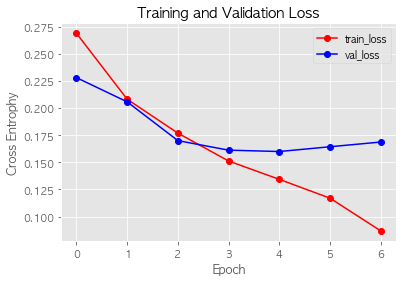

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [47]:
def sentiment_predict1(new_sentence):
    if new_sentence != '':
        new_sentence1 = text_cleaning(new_sentence)
        new_sentence2 = rhinoMorph.onlyMorph_list(rn,new_sentence1, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False)
        new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
        if new_sentence3 != []:
            X = np.array([encode_sentence_lstm(new_sentence3,200)])
            score = float(model.predict(X)) # 예측
            if(score > 0.5):
                print("아동학대 가능성이 {:.2f}% 확률입니다.\n".format(score * 100))
            else:
                print("아동학대 가능성이 {:.2f}% 확률입니다.\n".format(score * 100))
        else:
            print('아동학대 가능성이 0% 확률입니다.\n')

In [52]:
doc = input()
# 엄마랑 아빠랑 맛있게 밥을 먹었어요

엄마가 제 몸을 자꾸 만지고 훑어봐요 아빠는 나를 자꾸 때립니다 정신적으로 너무 힘들어요.... 우울합니다


In [53]:
sentiment_predict1(doc)

아동학대 가능성이 99.99% 확률입니다.



In [50]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)


In [51]:
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk
